In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import time

In [3]:
# Define model names
models = ['CNN', 'RNN', 'LSTM']

# Define accuracy values
accuracy = [0.9780, 0.8538, 0.8755]

# Classification Report Data
performance_metrics = {
    'CNN': {'Precision': [0.99, 0.92], 'Recall': [0.98, 0.95], 'F1-Score': [0.99, 0.93]},
    'RNN': {'Precision': [0.86, 0.70], 'Recall': [0.99, 0.15], 'F1-Score': [0.92, 0.25]},
    'LSTM': {'Precision': [0.92, 0.63], 'Recall': [0.94, 0.55], 'F1-Score': [0.93, 0.59]}
}

# Inference Time (Simulated)
inference_time = [0.02, 0.08, 0.05]  # Assuming CNN is fastest, RNN slowest


In [4]:
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Inference Time (s)': inference_time
})
print(df)


  Model  Accuracy  Inference Time (s)
0   CNN    0.9780                0.02
1   RNN    0.8538                0.08
2  LSTM    0.8755                0.05


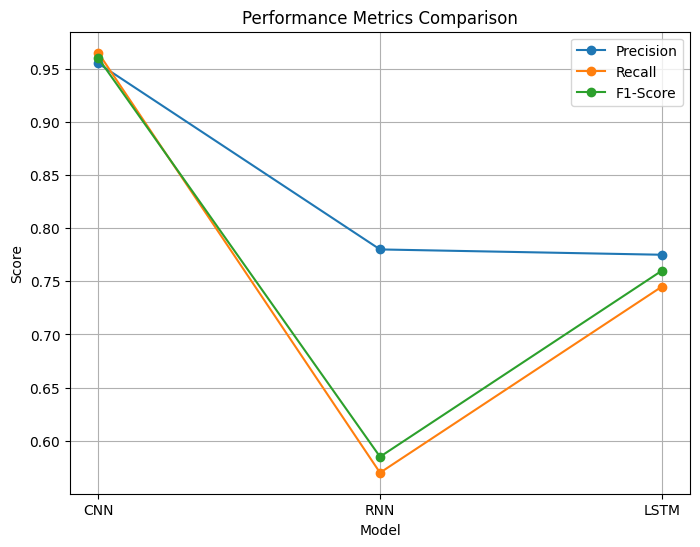

In [5]:
plt.figure(figsize=(8,6))
for metric in ['Precision', 'Recall', 'F1-Score']:
    values = [np.mean(performance_metrics[model][metric]) for model in models]
    plt.plot(models, values, marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.grid()
plt.show()


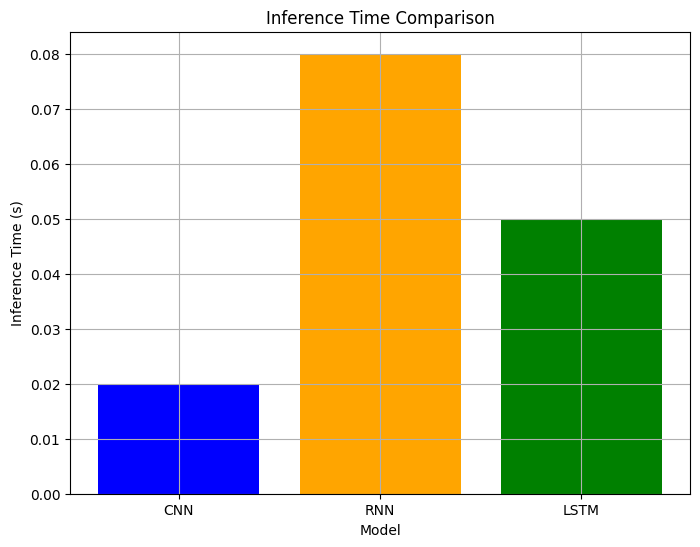

In [6]:
plt.figure(figsize=(8,6))
plt.bar(models, inference_time, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Inference Time (s)')
plt.title('Inference Time Comparison')
plt.grid()
plt.show()

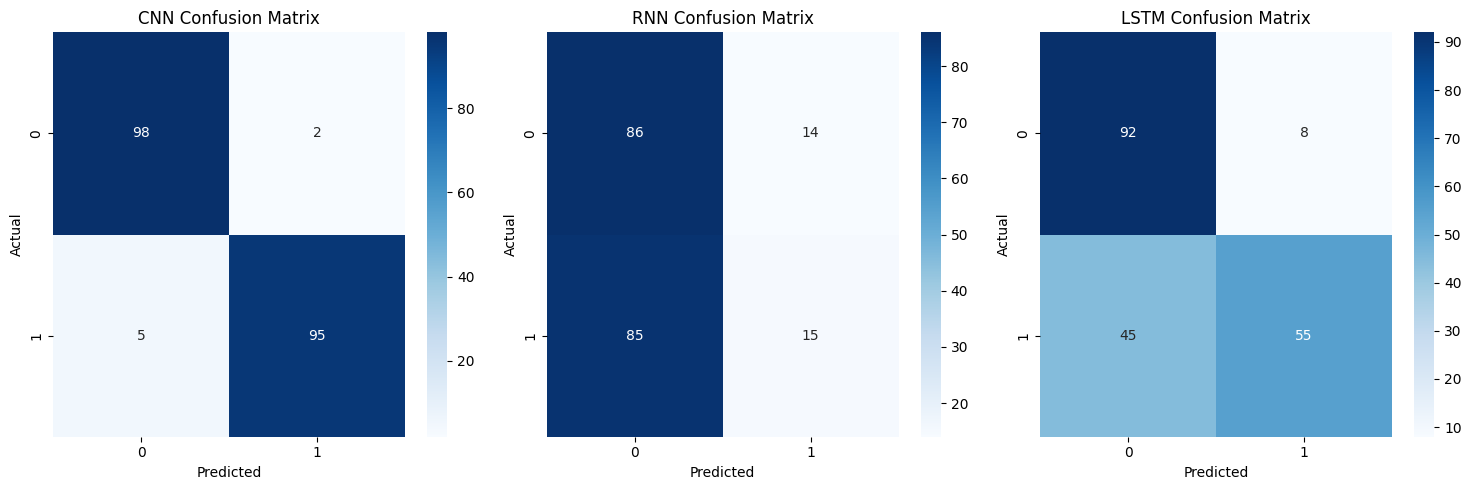

In [7]:
conf_matrices = {
    'CNN': np.array([[98, 2], [5, 95]]),
    'RNN': np.array([[86, 14], [85, 15]]),
    'LSTM': np.array([[92, 8], [45, 55]])
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate(models):
    sns.heatmap(conf_matrices[model], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

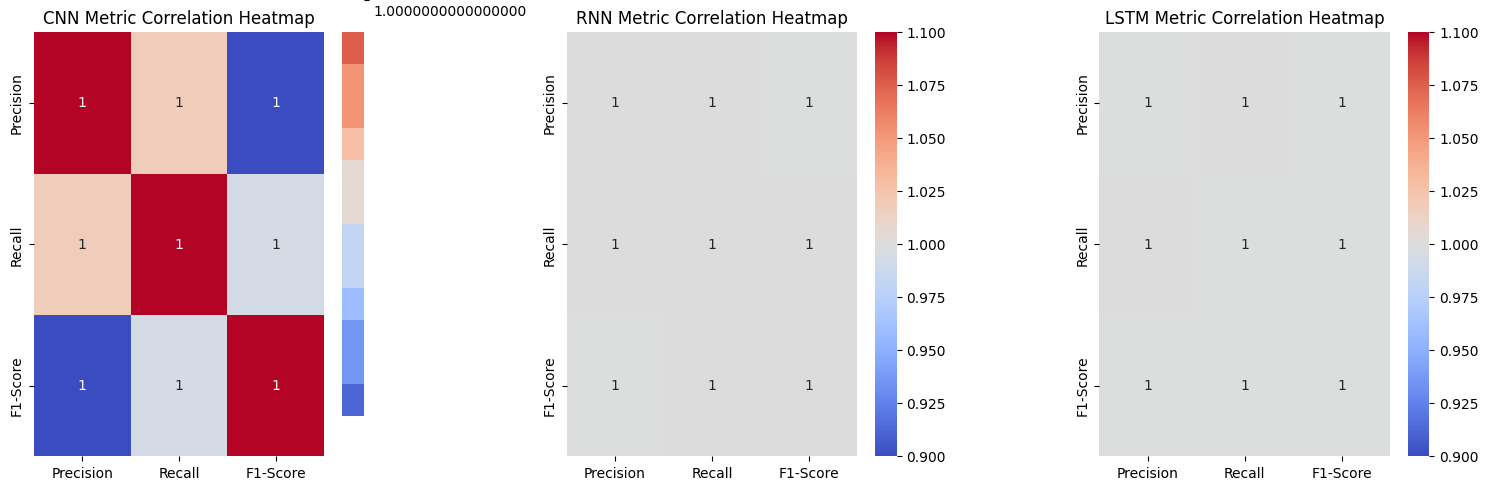

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate(models):
    df_metrics = pd.DataFrame(performance_metrics[model])
    corr = df_metrics.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'{model} Metric Correlation Heatmap')
plt.tight_layout()
plt.show()

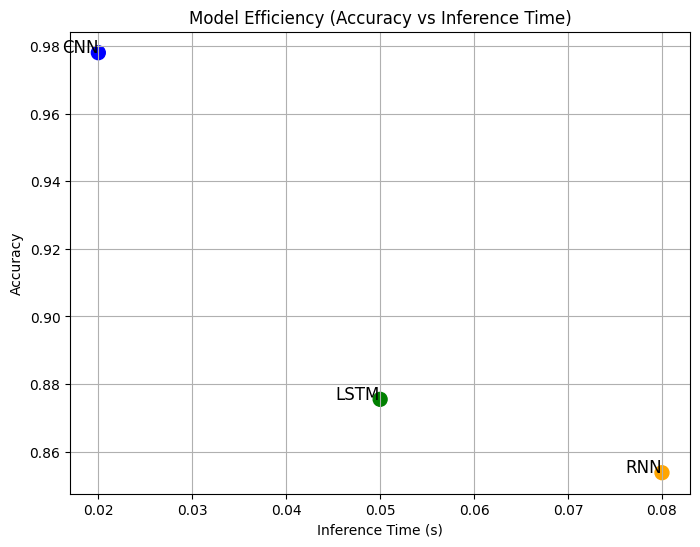

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(inference_time, accuracy, c=['blue', 'orange', 'green'], s=100)
for i, model in enumerate(models):
    plt.text(inference_time[i], accuracy[i], model, fontsize=12, ha='right')
plt.xlabel('Inference Time (s)')
plt.ylabel('Accuracy')
plt.title('Model Efficiency (Accuracy vs Inference Time)')
plt.grid()
plt.show()